In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.utils import to_categorical

## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>



Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(f"X_train_shape: {x_train.shape}")
print(f"X_test_shape: {x_test.shape}")
print(f"y_train_shape: {y_train.shape}")
print(f"y_test_shape: {y_test.shape}")

X_train_shape: (60000, 28, 28)
X_test_shape: (10000, 28, 28)
y_train_shape: (60000,)
y_test_shape: (10000,)


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

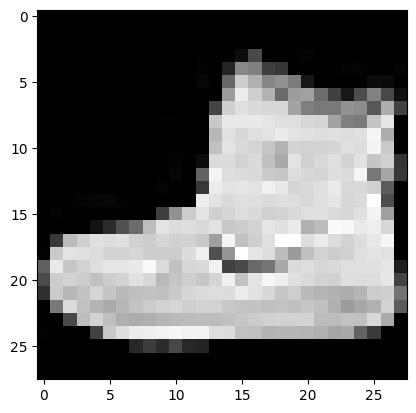

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray');

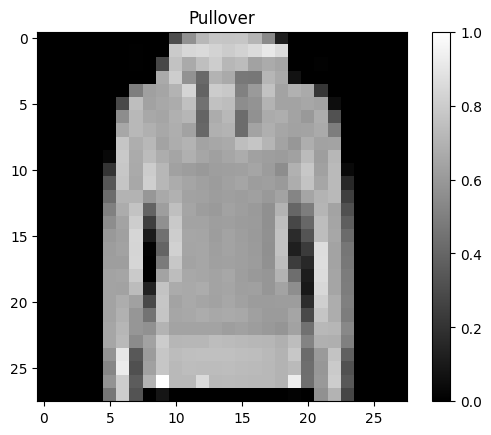

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names for Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Choose a random index from the dataset
index = np.random.randint(0, len(x_train))

# Get the image and label
image = x_train[index]
label = class_names[np.argmax(y_train[index])]  # Convert one-hot encoded label to class name

# Plot the image
plt.figure()
plt.imshow(image, cmap='gray')
plt.title(label)
plt.colorbar()
plt.show()

In [ ]:
# x_train[0]

In [ ]:


# Create a Sequential model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten layer to convert 2D images to 1D array

    Dense(128, activation='relu'),  # Fully connected Dense layer with 128 neurons and ReLU activation

    Dense(64, activation='relu'),   # Fully connected Dense layer with 64 neurons and ReLU activation

    Dense(10, activation='softmax') # Fully connected Dense layer with 10 neurons and softmax activation
])


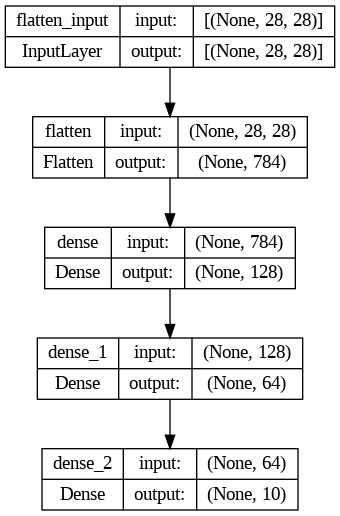

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer=Adam(),            # Compile the model with the Adam optimizer
              loss=CategoricalCrossentropy(), # Use Categorical Crossentropy loss function
              metrics=['accuracy'])           # Evaluate and display accuracy during training

In [ ]:
model.summary()  # Display a summary of the model's architecture, including layer information and parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 10        # Number of training epochs
batch_size = 10000        # Number of samples in each training batch

# Train the model on the training data and validate using a portion of it
history = model.fit(x_train, y_train,            # Training data and labels
                    epochs=num_epochs,           # Number of epochs to train
                    batch_size=batch_size,       # Number of samples in each batch
                    validation_split=0.2)        # Fraction of training data to use for validation


Epoch 1/10
5/5 [==============================] - 0s 76ms/step - loss: 0.5205 - accuracy: 0.8224 - val_loss: 0.5165 - val_accuracy: 0.8232
Epoch 2/10
5/5 [==============================] - 0s 31ms/step - loss: 0.5052 - accuracy: 0.8268 - val_loss: 0.5032 - val_accuracy: 0.8268
Epoch 3/10
5/5 [==============================] - 0s 40ms/step - loss: 0.4923 - accuracy: 0.8314 - val_loss: 0.4935 - val_accuracy: 0.8300
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 0.4807 - accuracy: 0.8359 - val_loss: 0.4835 - val_accuracy: 0.8343
Epoch 5/10
5/5 [==============================] - 0s 40ms/step - loss: 0.4717 - accuracy: 0.8383 - val_loss: 0.4751 - val_accuracy: 0.8332
Epoch 6/10
5/5 [==============================] - 0s 33ms/step - loss: 0.4632 - accuracy: 0.8410 - val_loss: 0.4684 - val_accuracy: 0.8379
Epoch 7/10
5/5 [==============================] - 0s 38ms/step - loss: 0.4559 - accuracy: 0.8436 - val_loss: 0.4601 - val_accuracy: 0.8397
Epoch 8/10
5/5 [===========

In [ ]:
# # Get loss values from training history
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, num_epochs + 1)

# # Plot loss vs. epoch
# plt.figure()
# plt.plot(epochs, train_loss, 'g', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.4972 - accuracy: 0.8288 - 645ms/epoch - 2ms/step

Test accuracy: 0.8288000226020813


1/1 [==============================] - 0s 16ms/step


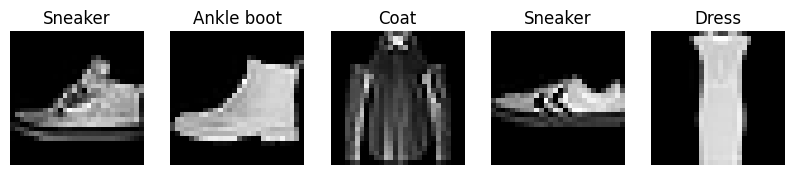

In [ ]:

# Predict on some test images
num_images_to_predict = 5

random_indices = np.random.randint(0, len(x_test), size=num_images_to_predict)


test_images = x_test[random_indices]
predicted_labels = model.predict(test_images)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Display the images along with predicted classes
plt.figure(figsize=(10, 5))
for i in range(num_images_to_predict):
    plt.subplot(1, num_images_to_predict, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(class_names[predicted_classes[i]])
    plt.axis('off')
plt.show()
